## Step 1 : Import all the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Load the data

In [6]:
data = pd.read_csv('Airbnbdataset.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
data.shape

(20640, 10)

## Observations : 
1. median_house_value is the target(dependent variable)

## Step 3: Data Cleaning, Data Wrangling, Data Preprocessing

In [8]:
## Missing Value Analysis : Get the total missing value count per column

data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
## Getting the percentage missing values per column

data.isnull().sum() / len(data) * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

### Performing Median value imputation for missing values in total_bedrooms

In [10]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: >

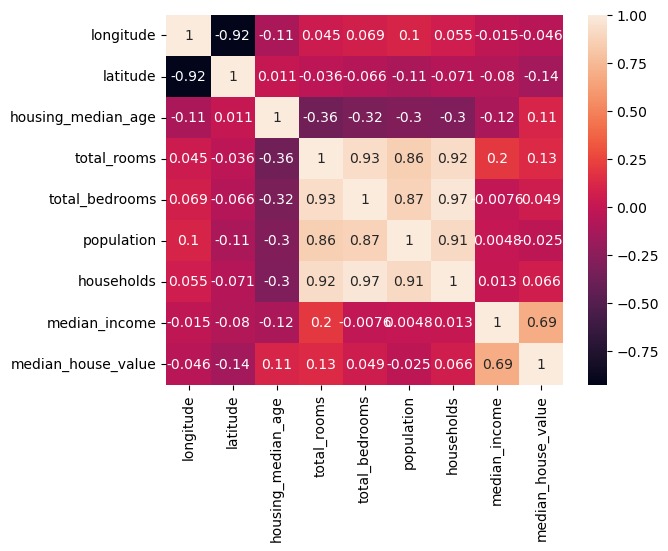

In [15]:
## Check for relation between target and all independent variable plus we also check for the problem of 
## Multicolinearity
sns.heatmap(data.corr(), annot = True)

In [16]:
data = data[['median_income', 'median_house_value']]
data.head()

,median_income,median_house_value
0,8.3252,452600
1,8.3014,358500
2,7.2574,352100
3,5.6431,341300
4,3.8462,342200


## Note:

1. The target has no relation with latitude, longitude, house_median_age, total_rooms, total_bedrooms, population, households. Hence these variable are dropped from the data
2. median_income has a relation with median_house_value. Hence, median_income is not dropped

## Step 4 : Seperate X and y

In [17]:
X = data.drop('median_house_value', axis = 1)
y = data['median_house_value']

## Step 5: Split the data into train and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Step 6: Apply Linear Regression on the train set

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

## Step 7: Perform predictions on X_test

In [21]:
y_pred = lr.predict(X_test)
y_pred

array([115101.61806807, 150652.22793035, 190330.40536516, ...,
       191664.4418957 , 197435.50901838, 172427.55148675])

In [22]:
X_test

,median_income
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250
...,...
17505,2.9545
13512,1.4891
10842,3.5120
16559,3.6500


## Step 8: Perform Evaluations

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.47293192589970223

In [24]:
lr.intercept_

44794.965556043084

In [25]:
lr.coef_

array([41819.32697598])

## Linear Regression equation is: y = mx + c

y = median_house_value
x = median_income
c = intercept
m = slope

median_house_value = 41819.32 * median_income + 44794.97